In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from causalgraphicalmodels import StructuralCausalModel

import matplotlib.pyplot as plt
plt.style.use('ggplot')


### Confounding Bias

In [2]:
exmp1 = StructuralCausalModel({
    "severeness": lambda n_samples: (np.random.uniform(size=n_samples) > 0.5) * 1,
    "medicine": lambda severeness, n_samples: 3 * severeness + np.random.normal(0, 0.5, size=n_samples),
    "survived": lambda medicine, severeness, n_samples: 6 * medicine - 2 * severeness
})

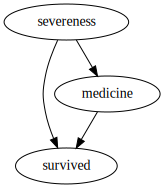

In [3]:
exmp1.cgm.draw()

In [4]:
df_exmp1 = exmp1.sample(10000)
df_exmp1.head()

,severeness,medicine,survived
0,0,-0.548593,-3.291557
1,1,2.858343,15.150060
2,0,-0.143040,-0.858239
3,0,-0.415209,-2.491253
4,0,0.444136,2.664819


In [5]:
result = sm.formula.ols('survived ~ medicine', data=df_exmp1).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0975,0.004,-22.388,0.000,-0.106,-0.089
medicine,5.3981,0.002,2694.844,0.000,5.394,5.402


In [6]:
tmp = df_exmp1[df_exmp1['severeness'] == 1]
result = sm.formula.ols('survived ~ medicine', data=tmp).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.0000,1.43e-16,-1.39e+16,0.000,-2.000,-2.000
medicine,6.0000,4.73e-17,1.27e+17,0.000,6.000,6.000


In [7]:
tmp = df_exmp1[df_exmp1['severeness'] == 0]
result = sm.formula.ols('survived ~ medicine', data=tmp).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-6.088e-17,6.32e-19,-96.293,0.000,-6.21e-17,-5.96e-17
medicine,6.0000,1.27e-18,4.72e+18,0.000,6.000,6.000


In [68]:
exmp2 = StructuralCausalModel({
    "severeness": lambda n_samples: np.random.normal(0, 1, size=n_samples),
    "medicine": lambda severeness, n_samples: 3 * severeness + np.random.normal(0, 0.5, size=n_samples),
    "survived": lambda medicine, severeness, n_samples: 6 * medicine - 2 * severeness
})

In [70]:
df_exmp2 = exmp2.sample(10000)
df_exmp2.head()

,severeness,medicine,survived
0,-0.884471,-1.825086,-9.181577
1,-0.333035,-1.126325,-6.091882
2,-0.992910,-2.750548,-14.517467
3,-0.210047,-0.745234,-4.051311
4,-1.110138,-3.382103,-18.072342


In [74]:
controls = ['severeness']
X = df_exmp2[controls].assign(intercept=1)
t = df_exmp2['medicine']
y = df_exmp2['survived']

In [78]:
model_2 = sm.formula.ols('survived ~ severeness + medicine', data=df_exmp2).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.45e-15,1.15e-16,-21.278,0.000,-2.68e-15,-2.22e-15
severeness,-2.0000,7.09e-16,-2.82e+15,0.000,-2.000,-2.000
medicine,6.0000,2.33e-16,2.58e+16,0.000,6.000,6.000


### Selection Bias

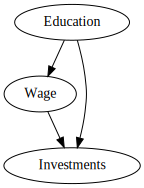

In [83]:
exmp3 = StructuralCausalModel({
    "Education": lambda n_samples: np.random.uniform(9, 4, size=n_samples),
    "Wage": lambda Education, n_samples: 7 * Education,
    "Investments": lambda Education, Wage, n_samples: 3 * Education + 1.2 * Wage
})

exmp3.cgm.draw()

In [84]:
df_exmp3 = exmp3.sample(10000)
df_exmp3.head()

,Education,Wage,Investments
0,6.083023,42.581163,69.346466
1,8.313726,58.196080,94.776473
2,5.722836,40.059852,65.240330
3,7.640193,53.481349,87.098197
4,5.772286,40.406005,65.804066


In [85]:
model = sm.formula.ols('Wage ~ Investments + Education', data=df_exmp3).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.916e-14,3.43e-15,5.582,0.000,1.24e-14,2.59e-14
Investments,0.6093,4.48e-17,1.36e+16,0.000,0.609,0.609
Education,0.0535,3.93e-18,1.36e+16,0.000,0.053,0.053


In [86]:
model = sm.formula.ols('Wage ~ Education', data=df_exmp3).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.733e-15,2.78e-15,3.145,0.002,3.29e-15,1.42e-14
Education,7.0000,4.16e-16,1.68e+16,0.000,7.000,7.000


### d-separation example